In [98]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import re

In [42]:
# Primero llamamos al data set
data_shark = pd.read_csv("attacks.csv", encoding='latin1')

In [43]:
# Comprobamos que se ha cargado
data_shark.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN


In [44]:
data_shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

#  Data Cleaning

## Tratamiento de columnas

In [45]:
# Esto lo hacemos para que sea mas sencillo trabajar con ellas en un futuro
data_shark.columns = [colum.strip().lower().replace('.', '').replace('(y/n)', '').replace(':', '').replace('or source', '').replace(' ', '').replace('number','') for colum in data_shark.columns]

In [46]:
# Comprobamos el resultado
data_shark.columns.values

array(['case', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time',
       'species', 'investigator', 'pdf', 'hrefformula', 'href', 'case1',
       'case2', 'originalorder', 'unnamed22', 'unnamed23'], dtype=object)

In [47]:
# Eliminar las columnas que su información es repetida con otras o la mayoria de sus valores son na o no es relevante
data_shark = data_shark.drop(['unnamed22', 'unnamed23', 'case1', 'case2','hrefformula','href',], axis=1)

## Missing Data

In [48]:
# empezamos limpiando todas las filas cuyos valores sean todos na y tambien los valores duplicados si hay
data_shark.dropna(how='all', axis=0, inplace=True)
data_shark.drop_duplicates(inplace=True) 

In [49]:
# Eliminamos las filas que tengan mas de diez valores na
data_shark = data_shark[data_shark.isnull().sum(axis=1) < 10]

#  El país más peligroso para surfear

In [50]:
# Creo un subset con las variables que me interesan
subset_danger = data_shark[['case', 'type', 'country', 'activity', 'injury', 'fatal']]

In [51]:
# Compruebo que se ha creado correctamente
subset_danger.head()

,case,type,country,activity,injury,fatal
0,2018.06.25,Boating,USA,Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,Unprovoked,USA,Standing,Minor injury to left thigh,N
2,2018.06.09,Invalid,USA,Surfing,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,Unprovoked,AUSTRALIA,Surfing,Minor injury to lower leg,N
4,2018.06.04,Provoked,MEXICO,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [52]:
# Compruebo que no quedan registros duplicados
subset_danger['case'].duplicated().sum()

16

In [53]:
duplicates = subset_danger[subset_danger['case'].duplicated(keep=False)]['case'].tolist()
duplicates

['2014.08.02',
 '2014.08.02',
 '2013.10.05',
 '2013.10.05',
 '2012.09.02.b',
 '2012.09.02.b',
 '2009.12.18',
 '2009.12.18',
 '2006.09.02',
 '2006.09.02',
 '2005.04.06',
 '2005.04.06',
 '1990.05.10',
 '1990.05.10',
 '1983.06.15',
 '1983.06.15',
 '1980.07.00',
 '1980.07.00',
 '1966.12.26',
 '1966.12.26',
 '1962.06.11.b',
 '1962.06.11.b',
 '1923.00.00.a',
 '1923.00.00.a',
 '1920.00.00.b',
 '1920.00.00.b',
 '1915.07.06.a.R',
 '1915.07.06.a.R',
 '1913.08.27.R',
 '1913.08.27.R',
 '1907.10.16.R',
 '1907.10.16.R']

In [54]:
# Si la información de estas filas no es igual.las mantendré si no eliminaré el duplicado
set_duplicates = set(duplicates)

for x in set_duplicates:
    dep = subset_danger[subset_danger['case'] == x]
    subset_danger.loc[dep.iloc[1,:].name, 'case'] = subset_danger.loc[dep.iloc[1,:].name]['case'] + 'z'

C:\Users\samue\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-54-e630fc29dede>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_danger.loc[dep.iloc[1,:].name, 'case'] = subset_danger.loc[dep.iloc[1,:].name]['case'] + 'z'


In [55]:
# Comprobamos que no hay duplicados
subset_danger.duplicated().sum()

0

In [56]:
# Comprobamos nuestros valores null
subset_danger.isnull().sum()

case          1
type          4
country      50
activity    544
injury       28
fatal       539
dtype: int64

In [57]:
# Sustituimos los valores na 
subset_danger[['case','type','country','injury','fatal','activity']] = subset_danger[['case','type','country','injury','fatal','activity']].fillna('unknow')

C:\Users\samue\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [58]:
subset_danger

,case,type,country,activity,injury,fatal
0,2018.06.25,Boating,USA,Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,Unprovoked,USA,Standing,Minor injury to left thigh,N
2,2018.06.09,Invalid,USA,Surfing,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,Unprovoked,AUSTRALIA,Surfing,Minor injury to lower leg,N
4,2018.06.04,Provoked,MEXICO,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...
6297,ND.0005,Unprovoked,AUSTRALIA,Diving,FATAL,Y
6298,ND.0004,Unprovoked,AUSTRALIA,Pearl diving,FATAL,Y
6299,ND.0003,Unprovoked,USA,Swimming,FATAL,Y
6300,ND.0002,Unprovoked,PANAMA,unknow,FATAL,Y


In [59]:
# Sacamos las filas de activity igual a surfing
sub_surfing = subset_danger[(subset_danger['activity'] == 'Surfing')]
sub_surfing

,case,type,country,activity,injury,fatal
2,2018.06.09,Invalid,USA,Surfing,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,Unprovoked,AUSTRALIA,Surfing,Minor injury to lower leg,N
15,2018.05.12,Unprovoked,SOUTH AFRICA,Surfing,"Minor injury, marks on board",N
16,2018.05.09,Questionable,AUSTRALIA,Surfing,"No injury, surfboard damaged",N
19,2018.04.28.a,Unprovoked,AUSTRALIA,Surfing,"No injury, knocked off board by shark",N
...,...,...,...,...,...,...
5235,1922.01.04,Unprovoked,AUSTRALIA,Surfing,"FATAL, disappeared, then his shark-bitten rema...",Y
5280,1918.03.22,Unprovoked,AUSTRALIA,Surfing,"Severe laceration to arm, necessitating surgic...",N
6097,1828.00.00,Unprovoked,USA,Surfing,FATAL,Y
6143,1779.00.00,Unprovoked,USA,Surfing,"FATAL, buttock lacerated",Y


In [60]:
# Agrupamos por paises 
a = sub_surfing.groupby('country').count()
a

,case,type,activity,injury,fatal
country,,,,,
ANGOLA,1,1,1,1,1
AUSTRALIA,195,195,195,195,195
BAHAMAS,2,2,2,2,2
BRAZIL,36,36,36,36,36
CANADA,1,1,1,1,1
COSTA RICA,4,4,4,4,4
DOMINICAN REPUBLIC,1,1,1,1,1
ECUADOR,4,4,4,4,4
EL SALVADOR,2,2,2,2,2


In [61]:
# ordenamos el resultado
a.sort_values(by='case', ascending=False, inplace=True)
a

,case,type,activity,injury,fatal
country,,,,,
USA,564,564,564,564,564
AUSTRALIA,195,195,195,195,195
SOUTH AFRICA,97,97,97,97,97
BRAZIL,36,36,36,36,36
REUNION,20,20,20,20,20
NEW ZEALAND,12,12,12,12,12
INDONESIA,6,6,6,6,6
MEXICO,6,6,6,6,6
ECUADOR,4,4,4,4,4


## Visualización

In [62]:
%matplotlib inline

<AxesSubplot:title={'center':'Most dangerous countries to surf'}, ylabel='country'>

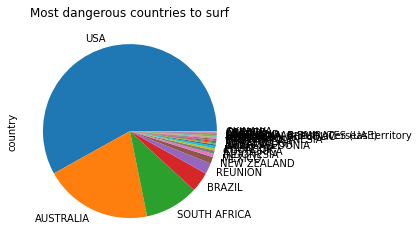

In [63]:
sub_surfing.country.value_counts().plot.pie(title = 'Most dangerous countries to surf')

<AxesSubplot:title={'center':'Fatal attacks'}, ylabel='fatal'>

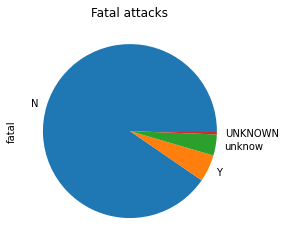

In [64]:
# Podemos ver cuantos de esos ataques han sido mortales
sub_surfing.fatal.value_counts().plot.pie(title = 'Fatal attacks')

# La especie de tiburón que más ataca


In [65]:
# Para esto vuelvo al data set original y creo otro subset con las columnas que me interesan

In [66]:
data_shark.columns.values

array(['case', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time',
       'species', 'investigator', 'pdf', 'originalorder'], dtype=object)

In [67]:
data_shark['species'].value_counts()

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
                                                     ... 
Bull sharks x 2                                         1
White shark, 5 m to 6 m [16.5' to 20]                   1
Small shark with white-tipped dorsal fin                1
White shark, 11' to 13'                                 1
Tiger shark, 9' to 10'                                  1
Name: species, Length: 1549, dtype: int64

In [68]:
new_df = data_shark['species']
new_df = pd.DataFrame(new_df)


In [69]:
# Elimino los na
new_df = new_df.dropna(how='all', axis=0)

In [70]:
# Limpio la columna 
new_df = new_df['species'].str.findall('((?:\w{3,} )?[s|S]hark)').str.join('').str.lower().value_counts().head(10)

In [71]:
# creo un nuevo data frame con los valores
#new_df = pd.DataFrame(new_df)
#new_df.reset_index(level=0, inplace=True)
new_dfr = pd.DataFrame(new_df)
#new = new.drop(new.index[0])
#new = new.drop(new.index[3])
#new = new.drop(new.index[9])
#new.reset_index(drop=True)
new_dfr.reset_index(level=0, inplace=True)
new_dfr

,index,species
0,shark,1225
1,white shark,621
2,tiger shark,256
3,,241
4,bull shark,166
5,nurse shark,95
6,whaler shark,65
7,reef shark,63
8,blacktip shark,59
9,small shark,55


In [72]:
clean_df = new_dfr.drop([0], axis=0)
#new = new_dfr.drop([2], axis=0)
clean_df = clean_df.drop([3], axis=0)
clean_df = clean_df.drop([9], axis=0)
clean_df = clean_df.reset_index()
clean_df

,level_0,index,species
0,1,white shark,621
1,2,tiger shark,256
2,4,bull shark,166
3,5,nurse shark,95
4,6,whaler shark,65
5,7,reef shark,63
6,8,blacktip shark,59


## Visualización

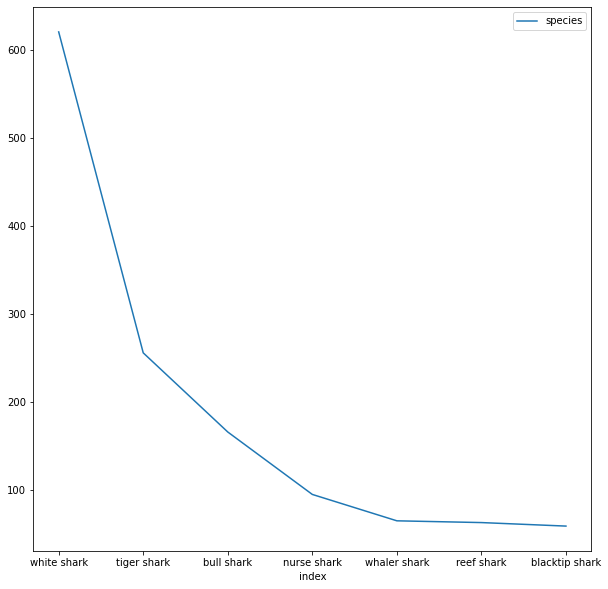

In [73]:
clean_df.plot(x='index', y='species', figsize=(10,10))
plt.show()

#  Limpiando la columna age 

In [74]:
data_age = data_shark

In [75]:
# Para la variable age como no todos sus caracteres son numericos usamos regex para remplazarlos
data_age['age'].replace(to_replace="[a-z,A-z]|[\s]|[\d]{3}|[\D$]", value=np.nan, regex=True, inplace=True)

In [76]:
# Pasamos age de tipo objet a int
data_age['age'] = pd.to_numeric(data_age['age'])

In [95]:
# Sustituimos los na de age por la media de las edades
data_age['age'].fillna(data_age['age'].mean(), inplace=True)
data_age['age'] = data_age['age'].astype(int)
data_age['age'].value_counts().head(50)

27    3017
17     154
18     150
19     142
20     141
15     139
16     138
21     119
22     117
25     108
24     106
14     101
13      94
26      83
23      80
28      80
29      78
30      76
12      73
32      69
35      69
10      56
40      56
31      52
34      50
38      48
33      44
43      43
36      43
37      42
42      38
39      38
41      38
11      37
9       35
52      35
50      33
45      32
47      30
44      29
48      28
49      28
8       28
46      27
55      23
7       22
51      20
54      17
60      16
57      16
Name: age, dtype: int64

# Limpiando la columna case

In [96]:
data_case = data_shark

In [101]:
# Limpiar las columnas de datetime
# Primero las pasamos a tipo date
data_case['case'] = pd.to_datetime(data_case['case'], errors='coerce', format='%Y-%m-%d')

In [102]:
data_case['case'].fillna(pd.Timedelta('0 days'))

0       2018-06-25 00:00:00
1       2018-06-18 00:00:00
2       2018-06-09 00:00:00
3       2018-06-08 00:00:00
4       2018-06-04 00:00:00
               ...         
6297        0 days 00:00:00
6298        0 days 00:00:00
6299        0 days 00:00:00
6300        0 days 00:00:00
6301        0 days 00:00:00
Name: case, Length: 6302, dtype: object